In [154]:
import numpy as np
import matplotlib.pyplot as plt

In [177]:
points = np.array(
    [
        [0, 0],
        [1, 0],
        [5.0, 5],
        [5.0, 8],
        [5.5, 10],
        [10, 0],
    ]
)

points2 = np.array(
    [
        [0, 0],
        [1, 0],
        [1, 4.5],
        [1.51, 4.5],
    ]
)

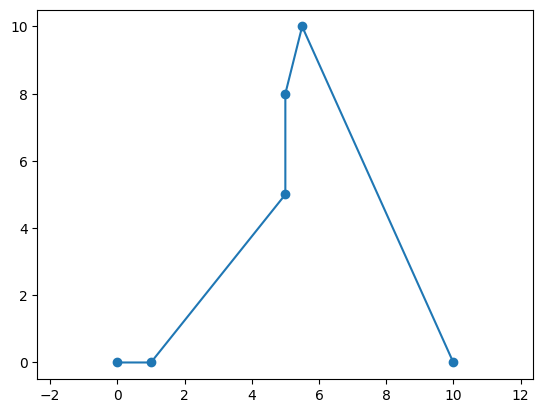

In [178]:
def plott(points):
    plt.plot(*points.T)
    plt.scatter(*points.T)
    plt.gca().axis("equal")


#     plt.show()

plott(points)

In [181]:
constant_speed = 1


def transform_func(dist):
    return dist / constant_speed


def subdivide(
    points, target_segdist, include_last_pt=False, include_intermediate_pt=False
):
    out = [points[0]]

    dist_leftover = 0.0
    for i in range(1, len(points)):
        dist_along_segment = transform_func(np.linalg.norm(points[i] - points[i - 1]))

        diff_vec = points[i] - points[i - 1]
        diff_mag = np.linalg.norm(diff_vec)
        diff_unit_vec = diff_vec / diff_mag
        # Check if adding the current segment exceeds the required distance for sampling
        while dist_leftover + dist_along_segment >= target_segdist:
            remaining_distance = target_segdist - dist_leftover

            if dist_leftover > 0:
                # left-over from last segment
                ratio = remaining_distance / dist_along_segment
                interpolated_point = points[i - 1] + ratio * diff_vec
            else:
                # purely from the current segment
                interpolated_point = out[-1] + diff_unit_vec * target_segdist

            # reset
            dist_leftover = 0.0
            out.append(interpolated_point)

            dist_along_segment -= remaining_distance

        # left over from this segment.
        dist_leftover += dist_along_segment

        if include_intermediate_pt and dist_leftover > 0:
            out.append(points[i])
            dist_leftover = 0

    if include_last_pt and dist_leftover > 0:
        out.append(points[-1])

    return np.array(out)

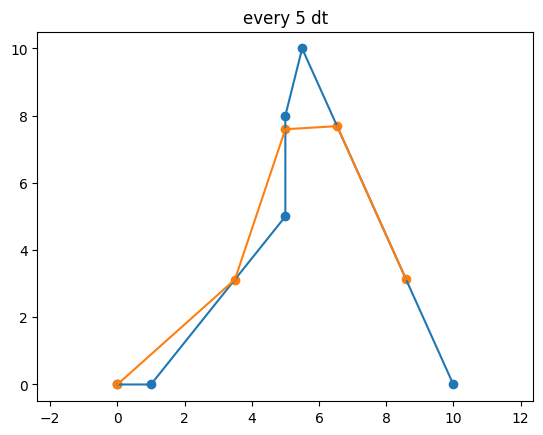

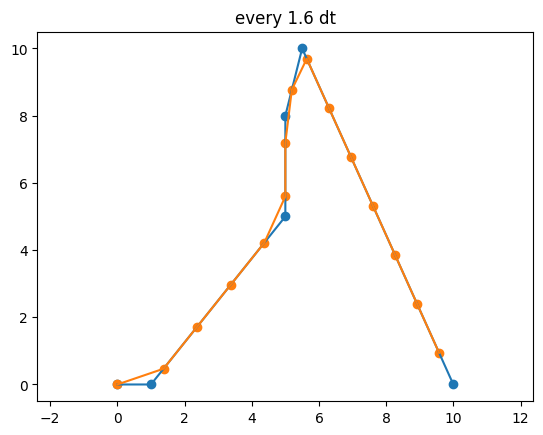

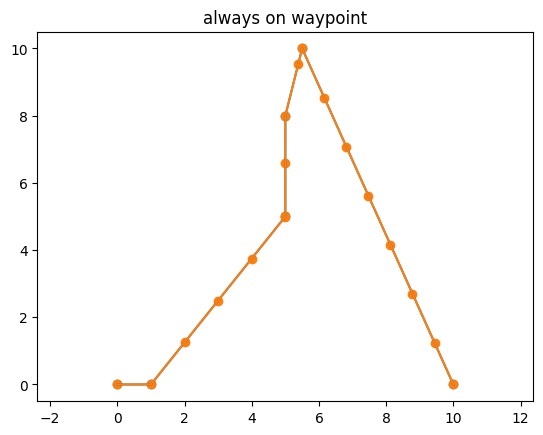

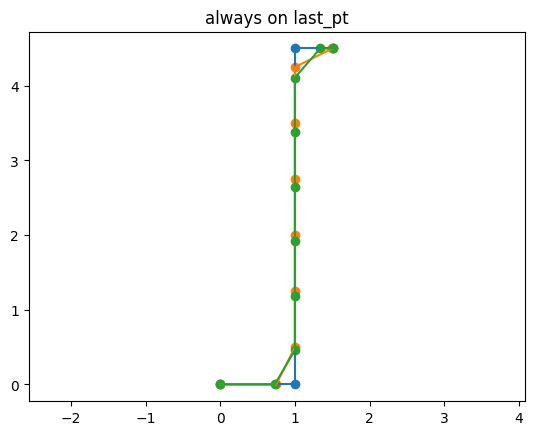

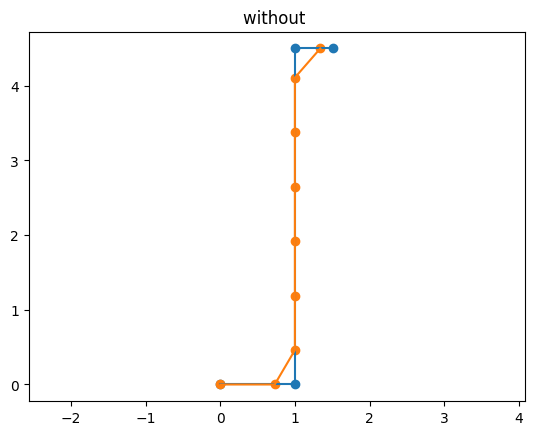

In [204]:
plott(points)
plott(subdivide(points, 5))
plt.title("every 5 dt")
plt.show()

plott(points)
plott(subdivide(points, 1.6))
plt.title("every 1.6 dt")
plt.show()


plott(points)
plott(subdivide(points, 1.6, include_intermediate_pt=True))
plt.title("always on waypoint")
plt.show()


plott(points2)
plott(subdivide(points2, 0.75, include_last_pt=True))
plott(subdivide(points2, 0.73, include_last_pt=True))
plt.title("always on last_pt")
plt.show()

plott(points2)
plott(subdivide(points2, 0.73))
plt.title("without ")
plt.show()